In [1]:
! pip install pydot graphviz

Defaulting to user installation because normal site-packages is not writeable


2023-09-24 15:56:23.704802: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-24 15:56:23.746338: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-24 15:56:23.746803: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-24 15:56:24.325444: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 3)                 12        
                                                                 
 output_layer (Dense)        (None, 2)                 8         
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


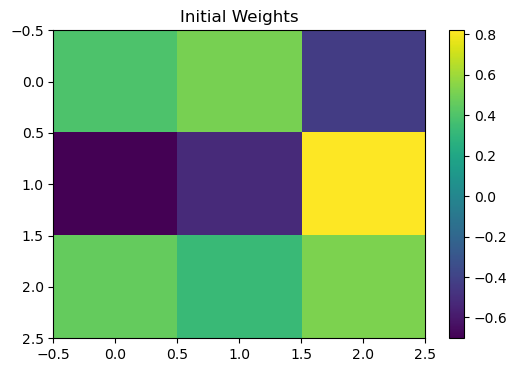

Epoch 1/3


1/1 [==============================] - 0s 67ms/stepss: 0.7701 - accuracy: 0.40
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


FileNotFoundError: [Errno 2] No such file or directory: 'model.png'

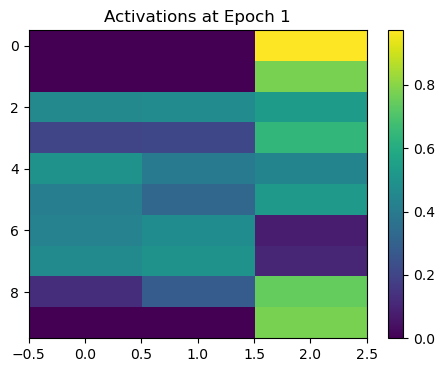

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LambdaCallback, History
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from PIL import Image



# Generate synthetic data
X_train = np.random.rand(100, 3)
y_train = to_categorical((X_train[:, 0] + X_train[:, 1] + X_train[:, 2] > 1.5).astype(int), num_classes=2)

# Define a simple model
model = Sequential([
    Dense(3, input_shape=(3,), activation='relu', name='hidden_layer'),  # Hidden layer with 3 neurons
    Dense(2, activation='softmax', name='output_layer')  # Output layer with 2 neurons
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model architecture
print(model.summary())

# Plot initial weights
initial_weights = model.layers[0].get_weights()[0]
plt.figure(figsize=(6, 4))
plt.title('Initial Weights')
plt.imshow(initial_weights, cmap='viridis', aspect='auto')
plt.colorbar()
plt.show()

# Callback to print activations
def plot_activations(epoch, logs):
    # Plot activations
    hidden_layer_model = Model(inputs=model.input, outputs=model.layers[0].output)
    activations = hidden_layer_model.predict(X_train[:10])
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.title(f'Activations at Epoch {epoch+1}')
    plt.imshow(activations, cmap='viridis', aspect='auto')
    plt.colorbar()

    # Plot model architecture
    plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
    img = Image.open('model.png')
    plt.subplot(1, 2, 2)
    plt.title('Model Architecture')
    plt.axis('off')
    plt.imshow(img)
    
    plt.tight_layout()
    plt.show()

plot_activations_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: plot_activations(epoch, logs))

# Fit the model and capture history
history = History()
model.fit(X_train, y_train, epochs=3, callbacks=[plot_activations_callback, history])

# Plot training loss
plt.figure(figsize=(6, 4))
plt.title('Training Loss')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
